![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   

[Соревнование на kaggle](https://www.kaggle.com/laysanmart/baseline-sf-tripadvisor-rating-v2-7-laysan)

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
# DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data1=data.copy() # копия чтобы можно было восстановить город после get dummies
# приведем названия колонок к удобным
data.columns=['restaurant_id','city','cuisine_style','ranking',
              'price_range','number_of_reviews','reviews','url_ta','id_ta','sample','Rating']
data1.columns=['restaurant_id','city','cuisine_style','ranking',
              'price_range','number_of_reviews','reviews','url_ta','id_ta','sample','Rating']

<ipython-input-11-84356ebf99fd>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_id      50000 non-null  object 
 1   city               50000 non-null  object 
 2   cuisine_style      38410 non-null  object 
 3   ranking            50000 non-null  float64
 4   price_range        32639 non-null  object 
 5   number_of_reviews  46800 non-null  float64
 6   reviews            49998 non-null  object 
 7   url_ta             50000 non-null  object 
 8   id_ta              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating
29550,id_232,Zurich,"['Swiss', 'European', 'Central European', 'Caf...",234.0,$$ - $$$,148.0,"[['Handmade chocolate covered marshmallows', '...",/Restaurant_Review-g188113-d4086801-Reviews-Ca...,d4086801,1,4.0
42550,id_16139,London,"['Indian', 'Asian', 'Balti', 'Bangladeshi', 'H...",16151.0,$$ - $$$,22.0,"[['Great Take-away', 'Amazing Take away'], ['0...",/Restaurant_Review-g186338-d5220212-Reviews-Sp...,d5220212,1,4.0
14518,id_5331,Madrid,NaN,5334.0,NaN,7.0,"[[], []]",/Restaurant_Review-g187514-d8560617-Reviews-Qu...,d8560617,1,4.0
9199,id_9199,Barcelona,NaN,7592.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187497-d7396035-Reviews-La...,d7396035,0,0.0
33512,id_5511,Milan,NaN,5514.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187849-d8341386-Reviews-Ba...,d8341386,1,3.0


In [14]:
data.reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['number_of_reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['number_of_reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [18]:
data.nunique(dropna=False)

restaurant_id              13094
city                          31
cuisine_style              10732
ranking                    12975
price_range                    4
number_of_reviews           1574
reviews                    41858
url_ta                     49963
id_ta                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

In [19]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'city',], dummy_na=True)
data['city']=data1['city']

In [20]:
data.head(5)

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating,...,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan,city
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,1,0,0,0,0,0,0,0,Paris
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,Helsinki
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,Edinburgh
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,London
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,Bratislava


In [21]:
data.sample(5)

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating,...,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan,city
27754,id_5341,NaN,5344.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187849-d6818575-Reviews-La...,d6818575,1,3.5,...,0,0,0,0,0,0,0,0,0,Milan
45757,id_4192,"['Italian', 'Cafe']",4195.0,$,24.0,"[['Lunch and Learn', 'Little cafe'], ['06/21/2...",/Restaurant_Review-g187849-d4752526-Reviews-Da...,d4752526,1,4.0,...,0,0,0,0,0,0,0,0,0,Milan
14286,id_311,"['Cafe', 'Fusion', 'Healthy']",312.0,NaN,6.0,"[['A great vegan choice', 'Small vegan bistro'...",/Restaurant_Review-g274924-d12827471-Reviews-M...,d12827471,1,4.5,...,0,0,0,0,0,0,0,0,0,Bratislava
22979,id_2401,['French'],2407.0,$$ - $$$,4.0,"[['A unique experience', 'absolutely delicious...",/Restaurant_Review-g188590-d4909504-Reviews-Ba...,d4909504,1,4.5,...,0,0,0,0,0,0,0,0,0,Amsterdam
28135,id_1408,"['Italian', 'Swiss', 'International', 'European']",1413.0,$,8.0,"[['A good option for an in-between snack', 'Ve...",/Restaurant_Review-g188113-d12169318-Reviews-K...,d12169318,1,5.0,...,0,0,0,0,0,0,0,1,0,Zurich


#### Возьмем следующий признак "Price Range".

In [22]:
data['price_range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  

In [23]:
#функция для присвоения значений цен цифрам от одного до трех
import random
def price_ranges(df):
    if df == '$':
        return 1
    elif df == '$$ - $$$':
        return 2
    elif df == '$$$$':
        return 3

#функция для заполнения NaN-ов
def func(x):
    if np.isnan(x):
        return random.randint(1,3)
    else:
        return x
# сделаем новый столбец price_range в цифрах 
data['price_range_num']=data['price_range'].apply(price_ranges)
data['price_range_num']=data['price_range_num'].fillna(2.0)

In [24]:
data['price_range_num'].value_counts() # проверим, какое распределение стало после

2.0    40402
1.0     7816
3.0     1782
Name: price_range_num, dtype: int64

## Кухни

In [25]:
data['cuisine_style']=data['cuisine_style'].fillna("['secret']")
data['cuisine_style']=data['cuisine_style'].apply(lambda x: eval(x))

In [26]:
# множество с редко встречающимися кухнями (менее 0.01%) датасета
data_rare=data.copy()
data_rare=data_rare.explode('cuisine_style')
rare_cuisine_dict = (data_rare['cuisine_style'].value_counts(
)[data_rare['cuisine_style'].value_counts(normalize=True) <= 0.0001]).to_dict()  
rare_cuisine = set(rare_cuisine_dict.keys()) 
rare_cuisine

{'Albanian',
 'Azerbaijani',
 'Burmese',
 'Canadian',
 'Caucasian',
 'Central Asian',
 'Ecuadorean',
 'Fujian',
 'Latvian',
 'Minority Chinese',
 'Native American',
 'New Zealand',
 'Polynesian',
 'Romanian',
 'Salvadoran',
 'Uzbek',
 'Welsh',
 'Xinjiang',
 'Yunnan'}

In [27]:
# множество с остальными кухнями
data_common=data.copy()
data_common=data_common.explode('cuisine_style')
common_cuisine_dict = (data_common['cuisine_style'].value_counts(
)[data_common['cuisine_style'].value_counts(normalize=True) > 0.0001]).to_dict()
common_cuisine = set(common_cuisine_dict.keys()) 
common_cuisine

{'Afghani',
 'African',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Cafe',
 'Cajun & Creole',
 'Cambodian',
 'Caribbean',
 'Central American',
 'Central European',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'Eastern European',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast Food',
 'Filipino',
 'French',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'Gluten Free Options',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mongolian',
 'Moroccan',
 'Nepali',
 'Norwegian',
 'Pakistani',
 'Persian',
 'Peruvian',
 'Pizza',

In [28]:
cuisine_styles = []  # создаём пустой список для хранения уникальных значений кухонь
for cuisine in data['cuisine_style']: 
    for ing in cuisine:
        if not ing in cuisine_styles:
            cuisine_styles.append(ing)
cuisine_styles # список со всеми кухнями

['Bar',
 'Pub',
 'European',
 'Scandinavian',
 'Gluten Free Options',
 'Vegetarian Friendly',
 'Vegan Options',
 'Italian',
 'Mediterranean',
 'Seafood',
 'French',
 'Cafe',
 'Fast Food',
 'Portuguese',
 'secret',
 'Greek',
 'Czech',
 'Eastern European',
 'Central European',
 'Pizza',
 'British',
 'Spanish',
 'Norwegian',
 'African',
 'Moroccan',
 'Middle Eastern',
 'Halal',
 'Indian',
 'Thai',
 'Dutch',
 'Welsh',
 'American',
 'Steakhouse',
 'Soups',
 'Scottish',
 'Fusion',
 'Street Food',
 'Hungarian',
 'Asian',
 'Wine Bar',
 'Barbecue',
 'Central American',
 'Peruvian',
 'South American',
 'Irish',
 'Polish',
 'Vietnamese',
 'Lebanese',
 'Turkish',
 'Healthy',
 'Japanese',
 'Sushi',
 'Austrian',
 'Chinese',
 'Danish',
 'International',
 'Gastropub',
 'Korean',
 'German',
 'Contemporary',
 'Arabic',
 'Diner',
 'Swiss',
 'Swedish',
 'Persian',
 'Australian',
 'Grill',
 'Mexican',
 'Latin',
 'Belgian',
 'Argentinean',
 'Tunisian',
 'Russian',
 'Nepali',
 'Bangladeshi',
 'Colombian',
 '

In [29]:
# создадим столбцы с названиями кухонь
def find_item(cell):
    if item in cell:
        return 1
    return 0

for item in common_cuisine:
    data[item] = data['cuisine_style'].apply(find_item)

data

<ipython-input-29-afb9088a141b>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[item] = data['cuisine_style'].apply(find_item)
<ipython-input-29-afb9088a141b>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[item] = data['cuisine_style'].apply(find_item)
<ipython-input-29-afb9088a141b>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating,...,Delicatessen,American,Fast Food,Cuban,Persian,Sushi,Hungarian,Hawaiian,Seafood,Fusion
0,id_0,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,0,0
49996,id_6340,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,1,0,0,0,0,0,0,0,0
49997,id_1649,"[Japanese, Sushi]",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,0,1,0,0,0,0
49998,id_640,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# редко стречающиеся кухни выделим в отдельную колонку
other_cuisine=[] 
for i in range(50000):
    if len(rare_cuisine.intersection(data.cuisine_style[i])) != 0:
        other_cuisine.append(1)
    else:
        other_cuisine.append(0)

len(other_cuisine) # сначала создадим список, в котором если кухня редкая - 1, если нет - 0

50000

In [31]:
data['other_cuisine']=other_cuisine # и добавим его колонкой в данные
data['other_cuisine'].value_counts()

<ipython-input-31-926522b807ff>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['other_cuisine']=other_cuisine # и добавим его колонкой в данные


0    49907
1       93
Name: other_cuisine, dtype: int64

In [32]:
data['cuisine_count'] = data['cuisine_style'].apply(
    lambda x: 1 if len(x) == 0 else len(x))

<ipython-input-32-28217a867bd6>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['cuisine_count'] = data['cuisine_style'].apply(


## Работа с отзывами и датами в отзывах

In [33]:
# вытащим даты в новый столбец
import re
pattern = re.compile('\d+/\d+/\d+')
data['reviews_date']=data['reviews'].apply(lambda x:pattern.findall(str(x)))

<ipython-input-33-0561698e9afc>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['reviews_date']=data['reviews'].apply(lambda x:pattern.findall(str(x)))


In [34]:
# функции для отделения первой и второй даты в разные столбцы
def last_date(df):
    if len(df) > 0:
        return df[0]
    else:
        return 0


def another_date(df):
    if len(df) > 0:
        return df[-1]
    else:
        return 0

In [35]:
#обработка дат в отзывах, пустые даты заполнены '1970-01-01'
data['last_reviews_date'] = data.reviews_date.apply(last_date)
data['first_reviews_date'] = data.reviews_date.apply(another_date)
data.last_reviews_date=pd.to_datetime(data['last_reviews_date'])
data.first_reviews_date=pd.to_datetime(data['first_reviews_date'])
data.sample(10)

<ipython-input-35-be3622b0225e>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['last_reviews_date'] = data.reviews_date.apply(last_date)
<ipython-input-35-be3622b0225e>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['first_reviews_date'] = data.reviews_date.apply(another_date)


,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating,...,Sushi,Hungarian,Hawaiian,Seafood,Fusion,other_cuisine,cuisine_count,reviews_date,last_reviews_date,first_reviews_date
18466,id_2001,"[European, Czech]",2004.0,NaN,2.0,"[['Great Italian Joint'], ['05/26/2015']]",/Restaurant_Review-g274707-d7287638-Reviews-Vi...,d7287638,1,5.0,...,0,0,0,0,0,0,2,[05/26/2015],2015-05-26,2015-05-26
31485,id_3887,[Chinese],3896.0,$,6.0,"[['Terrible service!', 'Fills a hole if in nee...",/Restaurant_Review-g274707-d7124043-Reviews-Ya...,d7124043,1,3.0,...,0,0,0,0,0,0,1,"[02/21/2017, 06/06/2016]",2017-02-21,2016-06-06
47935,id_1245,[secret],1247.0,NaN,58.0,"[['Great cakes, poor service', 'Neighborly res...",/Restaurant_Review-g187323-d1341391-Reviews-Wi...,d1341391,1,4.5,...,0,0,0,0,0,0,1,"[12/27/2015, 09/26/2015]",2015-12-27,2015-09-26
30687,id_2441,"[Bar, European, American, Spanish, Pub, Fusion...",2442.0,$$ - $$$,102.0,"[['Amazing Brunch!', 'Best Do It Yourself Brun...",/Restaurant_Review-g187497-d6418460-Reviews-Ti...,d6418460,1,4.0,...,0,0,0,0,1,0,8,"[05/30/2017, 04/02/2017]",2017-05-30,2017-04-02
16267,id_11941,[Thai],11951.0,NaN,8.0,"[['good value Indian food', 'Indian dinner'], ...",/Restaurant_Review-g186338-d4910588-Reviews-Th...,d4910588,1,4.0,...,0,0,0,0,0,0,1,"[09/17/2017, 01/13/2017]",2017-09-17,2017-01-13
21646,id_56,"[German, Bar, Cafe, European, Vegetarian Frien...",57.0,$$ - $$$,200.0,"[['Loved this place ...', 'Beer with the view'...",/Restaurant_Review-g187331-d966340-Reviews-Str...,d966340,1,4.5,...,0,0,0,0,0,0,5,"[01/03/2018, 09/18/2017]",2018-01-03,2017-09-18
15080,id_121,"[Mediterranean, Greek, Vegetarian Friendly, Ve...",122.0,$,131.0,"[['This place is a gem!', 'Like Eating with Fa...",/Restaurant_Review-g189400-d5312490-Reviews-Ta...,d5312490,1,5.0,...,0,0,0,0,0,0,4,"[12/13/2017, 11/04/2017]",2017-12-13,2017-11-04
48205,id_6690,[secret],6693.0,NaN,18.0,"[[], []]",/Restaurant_Review-g187514-d6557919-Reviews-Ca...,d6557919,1,3.5,...,0,0,0,0,0,0,1,[],1970-01-01,1970-01-01
5999,id_5999,[Italian],4855.0,$$ - $$$,6.0,"[['Hidden diamond'], ['01/02/2018']]",/Restaurant_Review-g187791-d13170411-Reviews-G...,d13170411,0,0.0,...,0,0,0,0,0,0,1,[01/02/2018],2018-01-02,2018-01-02
37483,id_6292,"[American, British, Diner, Vegetarian Friendly...",6301.0,$$ - $$$,223.0,"[['Nothing Special', 'Fabulous Pulled Pork'], ...",/Restaurant_Review-g186338-d8058041-Reviews-Th...,d8058041,1,3.5,...,0,0,0,0,0,0,6,"[01/03/2018, 01/02/2018]",2018-01-03,2018-01-02


In [36]:
data['timedelta']=(data.last_reviews_date-data.first_reviews_date)
data['timedelta']=pd.to_numeric(data['timedelta'].dt.days, downcast ='integer') # добавим столбец с количеством дней между отзывами

In [84]:
#Пока не умею размечать текст, поэтому пройдусь по всем отзывам и попробую найти маркеры для плохих и хороших отзывов

In [37]:
# Создадим множества со словами, которые встречаются в плохих или хороших отзывах
good_words = {'good', 'fine', 'delicious', 'best', 'wonderful', 'nice', 'better', 'top notch', 'great', 'cozy',
              'yummy', 'amazing', 'fantastic', 'wonderful', 'perfect', 'tasty', 'fab', 'worth', 'excellent', 'ace',
              'beautiful', 'lovely', 'quick', 'top', 'enjoyable', 'fabulous'}
bad_words = {'bad', 'worst', 'poor', 'awful', 'rude', 'noisy', 'horrible', 'wrong', 'blaah', 'slow', 'poor', 'rough',
             'dirty', 'overpriced', 'nothing'}

In [38]:
data['reviews']=data['reviews'].str.lower() # приведем отзывы к нижнему регистру
data['reviews_new']=data['reviews'].apply(lambda x:re.split(r'\W+', str(x), maxsplit=0)) # и сделаем из отзывов списки слов

In [39]:
good=[] 
for i in range(50000):
    if len(good_words.intersection(data.reviews_new[i])) != 0:
        good.append(1)
    else:
        good.append(0)
len(good) # список с 0 и 1 (если в отзыве слова из "хорошего" списка)

50000

In [40]:
bad=[] 
for i in range(50000):
    if len(bad_words.intersection(data.reviews_new[i])) != 0:
        bad.append(1)
    else:
        bad.append(0)
len(bad) # список с 0 и 1 (если в отзыве слова из "плохого" списка)

50000

In [41]:
data['good_reviews']=good # и добавим его колонкой в данные
data['good_reviews'].value_counts()

1    31489
0    18511
Name: good_reviews, dtype: int64

In [42]:
data['bad_reviews']=bad # и добавим его колонкой в данные
data['bad_reviews'].value_counts()

0    47308
1     2692
Name: bad_reviews, dtype: int64

### Добавим данные

In [43]:
# словарь с плотностью населения
density_of_city = {'London': 5137, 'Paris': 20781, 'Madrid': 5390, 'Barcelona': 15779, 'Berlin': 4463, 'Milan': 7385,
                    'Rome': 2229, 'Prague': 2473, 'Lisbon': 5066, 'Vienna': 4438, 'Amsterdam': 4457, 'Brussels': 4439,
                    'Hamburg': 2388, 'Munich': 4686, 'Lyon': 10023, 'Stockholm': 5114, 'Budapest': 3306, 'Warsaw': 3461,
                    'Dublin': 4588, 'Copenhagen': 4514, 'Athens': 17026, 'Edinburgh': 4136, 'Zurich': 4574, 'Oporto': 6946,
                    'Geneva': 6816, 'Krakow': 2325, 'Oslo': 1527, 'Helsinki': 2739, 'Bratislava': 1140, 'Luxembourg': 245,
                    'Ljubljana': 1759}

In [44]:
# сначала делаем DF из словаря, и добавляем плотность городов
density_of_city_df=pd.DataFrame(list(density_of_city.items()),
                           columns=['city','density_of_city'])
data=data.merge(density_of_city_df, how='left',left_on='city', right_on='city')

In [45]:
# добавим колонку с количеством ресторанов (по id) возожно, как-то влияет большая это сеть один ресторан
count_rests_dict = data.restaurant_id.value_counts().to_dict()
count_rests = pd.DataFrame(list(count_rests_dict.items()),
                           columns=['restaurant_id','count_rests'])
count_rests

,restaurant_id,count_rests
0,id_227,19
1,id_633,19
2,id_436,19
3,id_871,19
4,id_585,18
...,...,...
13089,id_14655,1
13090,id_14405,1
13091,id_15809,1
13092,id_14855,1


In [46]:
# добавим колонку с общим количеством ресторанов в городе
count_in_city_dict = data.city.value_counts().to_dict()
count_in_city = pd.DataFrame(list(count_in_city_dict.items()),
                           columns=['city','count_in_city'])
count_in_city

,city,count_in_city
0,London,7193
1,Paris,6108
2,Madrid,3813
3,Barcelona,3395
4,Berlin,2705
5,Milan,2694
6,Rome,2589
7,Prague,1816
8,Lisbon,1647
9,Vienna,1443


In [47]:
data=data.merge(count_rests, how='left',left_on='restaurant_id', right_on='restaurant_id')
data=data.merge(count_in_city, how='left',left_on='city', right_on='city')
data

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating,...,reviews_date,last_reviews_date,first_reviews_date,timedelta,reviews_new,good_reviews,bad_reviews,density_of_city,count_rests,count_in_city
0,id_0,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,[],1970-01-01,1970-01-01,0,"[, ]",0,0,20781,16,6108
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['very good reviews!', 'fine dining in hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,"[12/05/2017, 10/29/2017]",2017-12-05,2017-10-29,37,"[, very, good, reviews, fine, dining, in, haka...",1,0,2739,10,475
2,id_2,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['better than the links', 'ivy black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,"[12/28/2017, 12/06/2017]",2017-12-28,2017-12-06,22,"[, better, than, the, links, ivy, black, 12, 2...",1,0,4136,15,745
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['most exquisite', 'delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,"[12/06/2017, 11/22/2017]",2017-12-06,2017-11-22,14,"[, most, exquisite, delicious, and, authentic,...",1,0,5137,9,7193
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['always the best in bratislava', 'very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,"[02/08/2018, 01/24/2018]",2018-02-08,2018-01-24,15,"[, always, the, best, in, bratislava, very, go...",1,0,1140,14,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['the real italian experience!', 'wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,"[12/16/2017, 11/12/2017]",2017-12-16,2017-11-12,34,"[, the, real, italian, experience, wonderful, ...",1,0,7385,15,2694
49996,id_6340,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['parisian atmosphere', 'bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,"[12/21/2017, 12/12/2017]",2017-12-21,2017-12-12,9,"[, parisian, atmosphere, bit, pricey, but, int...",1,0,20781,3,6108
49997,id_1649,"[Japanese, Sushi]",1652.0,NaN,4.0,"[['good by swedish standards', 'a hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,"[11/03/2016, 04/12/2008]",2016-11-03,2008-04-12,3127,"[, good, by, swedish, standards, a, hidden, je...",1,0,5114,11,1033
49998,id_640,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['underground restaurant', 'oldest restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,"[07/11/2017, 06/18/2017]",2017-07-11,2017-06-18,23,"[, underground, restaurant, oldest, restaurant...",0,0,3461,9,925


In [48]:
# нормируем признак  ranking
a=np.array(data.ranking)
a=np.reshape(a,(50000,1)) # матрица из значений для нормировки

scaler = StandardScaler()
ranking_norm=scaler.fit_transform(a) # нормированные значения

ranking_norm

array([[ 2.51309003],
       [-0.96172275],
       [-0.77145534],
       ...,
       [-0.54389118],
       [-0.81713033],
       [ 0.31420407]])

In [49]:
data=data.join(pd.DataFrame(ranking_norm), rsuffix='_') # добавляем в наши данные
data

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating,...,last_reviews_date,first_reviews_date,timedelta,reviews_new,good_reviews,bad_reviews,density_of_city,count_rests,count_in_city,0
0,id_0,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,1970-01-01,1970-01-01,0,"[, ]",0,0,20781,16,6108,2.513090
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['very good reviews!', 'fine dining in hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,2017-12-05,2017-10-29,37,"[, very, good, reviews, fine, dining, in, haka...",1,0,2739,10,475,-0.961723
2,id_2,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['better than the links', 'ivy black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,2017-12-28,2017-12-06,22,"[, better, than, the, links, ivy, black, 12, 2...",1,0,4136,15,745,-0.771455
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['most exquisite', 'delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,2017-12-06,2017-11-22,14,"[, most, exquisite, delicious, and, authentic,...",1,0,5137,9,7193,-0.539297
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['always the best in bratislava', 'very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,2018-02-08,2018-01-24,15,"[, always, the, best, in, bratislava, very, go...",1,0,1140,14,380,-0.980371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['the real italian experience!', 'wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,2017-12-16,2017-11-12,34,"[, the, real, italian, experience, wonderful, ...",1,0,7385,15,2694,-0.855238
49996,id_6340,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['parisian atmosphere', 'bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,2017-12-21,2017-12-12,9,"[, parisian, atmosphere, bit, pricey, but, int...",1,0,20781,3,6108,0.723387
49997,id_1649,"[Japanese, Sushi]",1652.0,NaN,4.0,"[['good by swedish standards', 'a hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,2016-11-03,2008-04-12,3127,"[, good, by, swedish, standards, a, hidden, je...",1,0,5114,11,1033,-0.543891
49998,id_640,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['underground restaurant', 'oldest restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,2017-07-11,2017-06-18,23,"[, underground, restaurant, oldest, restaurant...",0,0,3461,9,925,-0.817130


In [50]:
data = data.rename(
    columns={0: 'ranking_norm'}) #  переименуем корректно столбец
data

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating,...,last_reviews_date,first_reviews_date,timedelta,reviews_new,good_reviews,bad_reviews,density_of_city,count_rests,count_in_city,ranking_norm
0,id_0,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,1970-01-01,1970-01-01,0,"[, ]",0,0,20781,16,6108,2.513090
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['very good reviews!', 'fine dining in hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,2017-12-05,2017-10-29,37,"[, very, good, reviews, fine, dining, in, haka...",1,0,2739,10,475,-0.961723
2,id_2,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['better than the links', 'ivy black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,2017-12-28,2017-12-06,22,"[, better, than, the, links, ivy, black, 12, 2...",1,0,4136,15,745,-0.771455
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['most exquisite', 'delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,2017-12-06,2017-11-22,14,"[, most, exquisite, delicious, and, authentic,...",1,0,5137,9,7193,-0.539297
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['always the best in bratislava', 'very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,2018-02-08,2018-01-24,15,"[, always, the, best, in, bratislava, very, go...",1,0,1140,14,380,-0.980371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['the real italian experience!', 'wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,2017-12-16,2017-11-12,34,"[, the, real, italian, experience, wonderful, ...",1,0,7385,15,2694,-0.855238
49996,id_6340,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['parisian atmosphere', 'bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,2017-12-21,2017-12-12,9,"[, parisian, atmosphere, bit, pricey, but, int...",1,0,20781,3,6108,0.723387
49997,id_1649,"[Japanese, Sushi]",1652.0,NaN,4.0,"[['good by swedish standards', 'a hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,2016-11-03,2008-04-12,3127,"[, good, by, swedish, standards, a, hidden, je...",1,0,5114,11,1033,-0.543891
49998,id_640,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['underground restaurant', 'oldest restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,2017-07-11,2017-06-18,23,"[, underground, restaurant, oldest, restaurant...",0,0,3461,9,925,-0.817130


In [51]:
# добавим колонку с средним значением ranking_norm в городе
ranking_city=data.pivot_table(values=['ranking_norm'],index=['city'],aggfunc='mean',fill_value = 0)
ranking_city

,ranking_norm
city,
Amsterdam,-0.560218
Athens,-0.752479
Barcelona,0.058106
Berlin,-0.110542
Bratislava,-0.865392
Brussels,-0.573647
Budapest,-0.660900
Copenhagen,-0.724930
Dublin,-0.727638


In [52]:
# добавим колонку с максимальным значением ranking_norm в городе
ranking_city_max=data.pivot_table(values=['ranking_norm'],index=['city'],aggfunc='max',fill_value = 0)
ranking_city_max

,ranking_norm
city,
Amsterdam,-0.110925
Athens,-0.507405
Barcelona,1.116624
Berlin,0.731765
Bratislava,-0.750104
Brussels,-0.177951
Budapest,-0.330921
Copenhagen,-0.459568
Dublin,-0.460649


In [53]:
# добавим колонку с минимальным значением ranking_norm в городе
ranking_city_min=data.pivot_table(values=['ranking_norm'],index=['city'],aggfunc='min',fill_value = 0)
ranking_city_min

,ranking_norm
city,
Amsterdam,-0.990101
Athens,-0.989560
Barcelona,-0.989020
Berlin,-0.989830
Bratislava,-0.989560
Brussels,-0.989560
Budapest,-0.990101
Copenhagen,-0.989560
Dublin,-0.989290


In [54]:
data=data.merge(ranking_city, how='left',left_on='city', right_on='city')

data = data.rename(
    columns={'ranking_norm_y': 'ranking_mean', 'ranking_norm_x': 'ranking_norm'})
data

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating,...,first_reviews_date,timedelta,reviews_new,good_reviews,bad_reviews,density_of_city,count_rests,count_in_city,ranking_norm,ranking_mean
0,id_0,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,1970-01-01,0,"[, ]",0,0,20781,16,6108,2.513090,0.884887
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['very good reviews!', 'fine dining in hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,2017-10-29,37,"[, very, good, reviews, fine, dining, in, haka...",1,0,2739,10,475,-0.961723,-0.837878
2,id_2,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['better than the links', 'ivy black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,2017-12-06,22,"[, better, than, the, links, ivy, black, 12, 2...",1,0,4136,15,745,-0.771455,-0.751150
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['most exquisite', 'delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,2017-11-22,14,"[, most, exquisite, delicious, and, authentic,...",1,0,5137,9,7193,-0.539297,1.217625
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['always the best in bratislava', 'very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,2018-01-24,15,"[, always, the, best, in, bratislava, very, go...",1,0,1140,14,380,-0.980371,-0.865392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['the real italian experience!', 'wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,2017-11-12,34,"[, the, real, italian, experience, wonderful, ...",1,0,7385,15,2694,-0.855238,-0.150917
49996,id_6340,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['parisian atmosphere', 'bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,2017-12-12,9,"[, parisian, atmosphere, bit, pricey, but, int...",1,0,20781,3,6108,0.723387,0.884887
49997,id_1649,"[Japanese, Sushi]",1652.0,NaN,4.0,"[['good by swedish standards', 'a hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,2008-04-12,3127,"[, good, by, swedish, standards, a, hidden, je...",1,0,5114,11,1033,-0.543891,-0.655921
49998,id_640,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['underground restaurant', 'oldest restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,2017-06-18,23,"[, underground, restaurant, oldest, restaurant...",0,0,3461,9,925,-0.817130,-0.705188


In [55]:
data=data.merge(ranking_city_max, how='left',left_on='city', right_on='city')

data = data.rename(
    columns={'ranking_norm_y': 'ranking_city_max', 'ranking_norm_x': 'ranking_norm'})
data

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating,...,timedelta,reviews_new,good_reviews,bad_reviews,density_of_city,count_rests,count_in_city,ranking_norm,ranking_mean,ranking_city_max
0,id_0,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,"[, ]",0,0,20781,16,6108,2.513090,0.884887,2.789572
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['very good reviews!', 'fine dining in hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,37,"[, very, good, reviews, fine, dining, in, haka...",1,0,2739,10,475,-0.961723,-0.837878,-0.681997
2,id_2,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['better than the links', 'ivy black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,22,"[, better, than, the, links, ivy, black, 12, 2...",1,0,4136,15,745,-0.771455,-0.751150,-0.513081
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['most exquisite', 'delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,14,"[, most, exquisite, delicious, and, authentic,...",1,0,5137,9,7193,-0.539297,1.217625,3.453887
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['always the best in bratislava', 'very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,15,"[, always, the, best, in, bratislava, very, go...",1,0,1140,14,380,-0.980371,-0.865392,-0.750104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['the real italian experience!', 'wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,34,"[, the, real, italian, experience, wonderful, ...",1,0,7385,15,2694,-0.855238,-0.150917,0.705550
49996,id_6340,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['parisian atmosphere', 'bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,9,"[, parisian, atmosphere, bit, pricey, but, int...",1,0,20781,3,6108,0.723387,0.884887,2.789572
49997,id_1649,"[Japanese, Sushi]",1652.0,NaN,4.0,"[['good by swedish standards', 'a hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,3127,"[, good, by, swedish, standards, a, hidden, je...",1,0,5114,11,1033,-0.543891,-0.655921,-0.324435
49998,id_640,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['underground restaurant', 'oldest restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,23,"[, underground, restaurant, oldest, restaurant...",0,0,3461,9,925,-0.817130,-0.705188,-0.408218


In [56]:
data

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,Rating,...,timedelta,reviews_new,good_reviews,bad_reviews,density_of_city,count_rests,count_in_city,ranking_norm,ranking_mean,ranking_city_max
0,id_0,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,"[, ]",0,0,20781,16,6108,2.513090,0.884887,2.789572
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['very good reviews!', 'fine dining in hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,37,"[, very, good, reviews, fine, dining, in, haka...",1,0,2739,10,475,-0.961723,-0.837878,-0.681997
2,id_2,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['better than the links', 'ivy black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,22,"[, better, than, the, links, ivy, black, 12, 2...",1,0,4136,15,745,-0.771455,-0.751150,-0.513081
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['most exquisite', 'delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,14,"[, most, exquisite, delicious, and, authentic,...",1,0,5137,9,7193,-0.539297,1.217625,3.453887
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['always the best in bratislava', 'very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,15,"[, always, the, best, in, bratislava, very, go...",1,0,1140,14,380,-0.980371,-0.865392,-0.750104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['the real italian experience!', 'wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,34,"[, the, real, italian, experience, wonderful, ...",1,0,7385,15,2694,-0.855238,-0.150917,0.705550
49996,id_6340,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['parisian atmosphere', 'bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,9,"[, parisian, atmosphere, bit, pricey, but, int...",1,0,20781,3,6108,0.723387,0.884887,2.789572
49997,id_1649,"[Japanese, Sushi]",1652.0,NaN,4.0,"[['good by swedish standards', 'a hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,3127,"[, good, by, swedish, standards, a, hidden, je...",1,0,5114,11,1033,-0.543891,-0.655921,-0.324435
49998,id_640,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['underground restaurant', 'oldest restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,23,"[, underground, restaurant, oldest, restaurant...",0,0,3461,9,925,-0.817130,-0.705188,-0.408218


# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

<AxesSubplot:>

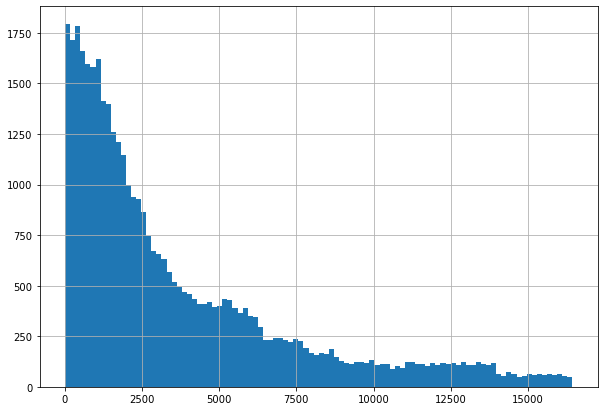

In [57]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

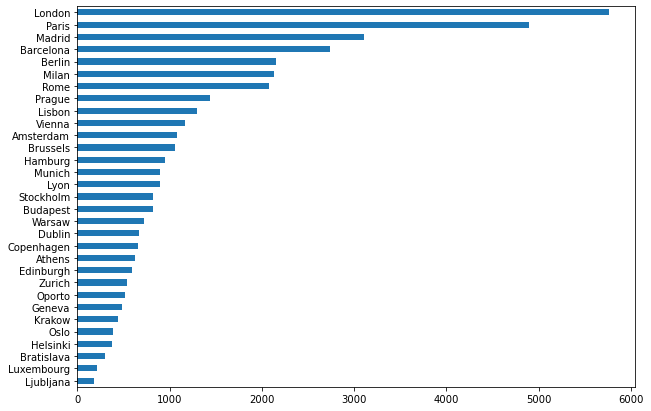

In [58]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

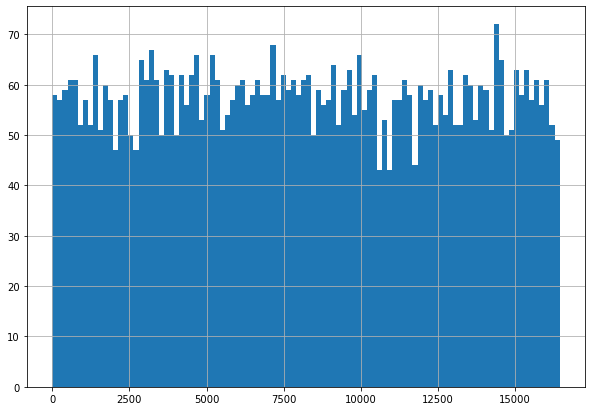

In [59]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

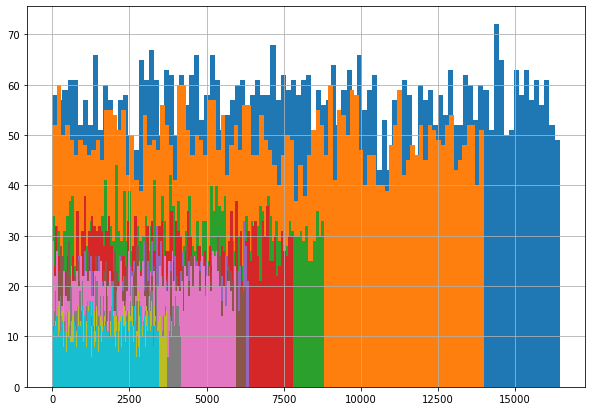

In [60]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.


### Посмотрим распределение целевой переменной

<AxesSubplot:>

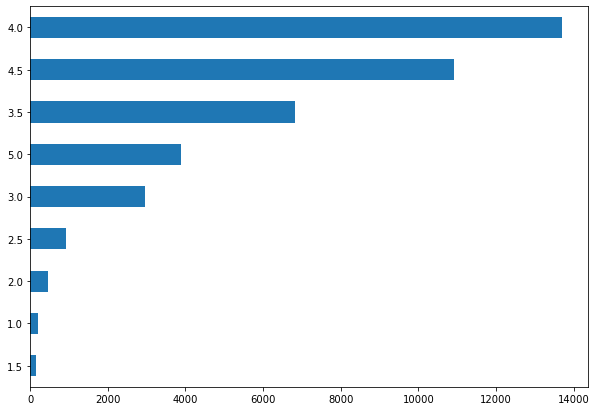

In [61]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

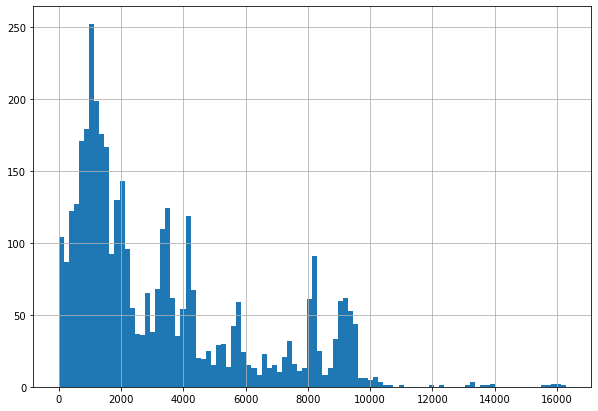

In [62]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

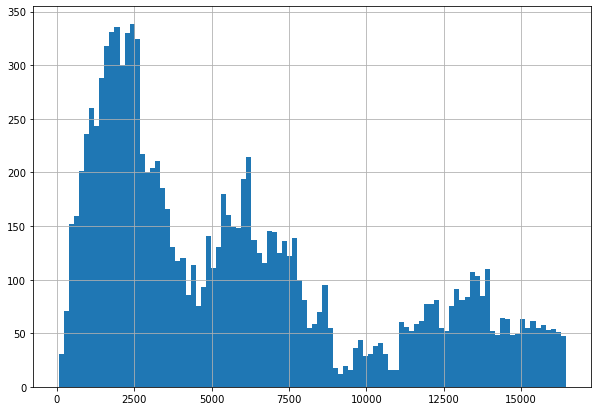

In [63]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И  [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

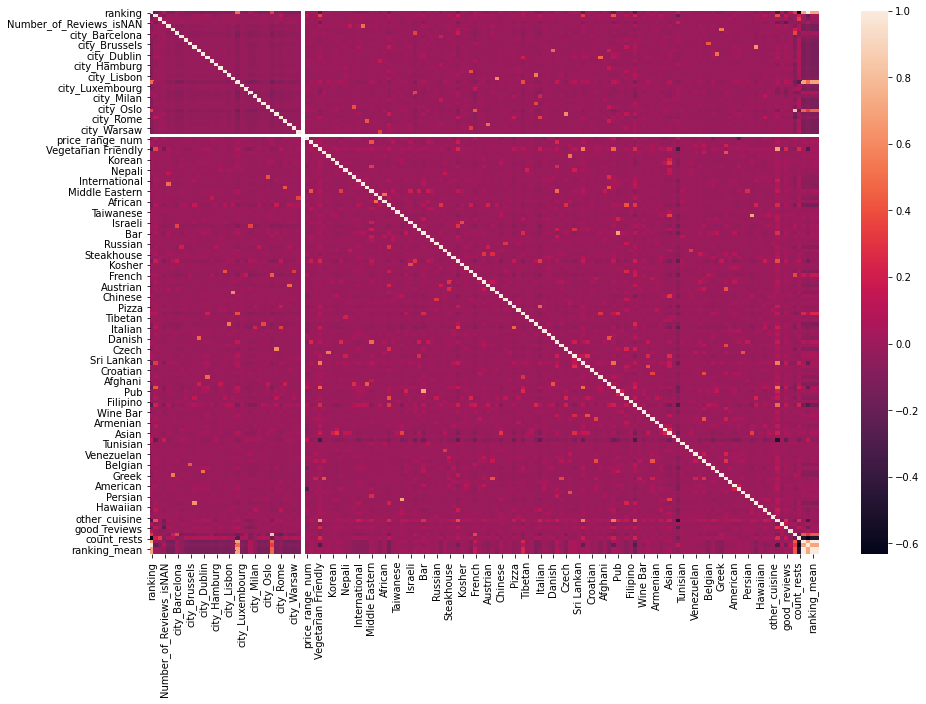

In [64]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

In [65]:
data.corr().Rating.sort_values(ascending=False).to_frame()

,Rating
Rating,1.000000
sample,0.936543
count_rests,0.331677
good_reviews,0.040816
Vegetarian Friendly,0.037317
...,...
city_Milan,-0.023233
bad_reviews,-0.063853
ranking,-0.109897
ranking_norm,-0.109897


# Data Preprocessing


In [66]:
data.drop(['restaurant_id','city','cuisine_style','reviews','url_ta','id_ta','price_range','reviews_date','last_reviews_date',
           'first_reviews_date', 'reviews_new'], axis = 1, inplace=True)

In [67]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    df_output.columns=['restaurant_id','city','cuisine_style','ranking',
                       'price_range','number_of_reviews','reviews','url_ta','id_ta','sample','Rating']
    # ################### 1. Предобработка ############################################################## 
 
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['number_of_reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'city',], dummy_na=True)
    df_output['city']=data1['city']
    
    df_output['price_range_num']=df_output['price_range'].apply(price_ranges)
    df_output['price_range_num']=df_output['price_range_num'].fillna(2.0)
    
    df_output['cuisine_style']=df_output['cuisine_style'].fillna("['secret']")
    df_output['cuisine_style']=df_output['cuisine_style'].apply(lambda x: eval(x))
    
    df_output['other_cuisine']=other_cuisine
    
    df_output['cuisine_count'] = df_output['cuisine_style'].apply(lambda x: 1 if len(x) == 0 else len(x))
    
    df_output['reviews_date']=df_output['reviews'].apply(lambda x:pattern.findall(str(x)))
    df_output['last_reviews_date'] = df_output.reviews_date.apply(last_date)
    df_output['first_reviews_date'] = df_output.reviews_date.apply(another_date)
    df_output.last_reviews_date=pd.to_datetime(df_output['last_reviews_date'])
    df_output.first_reviews_date=pd.to_datetime(df_output['first_reviews_date'])
    df_output['timedelta']=(df_output.last_reviews_date-df_output.first_reviews_date)
    df_output['timedelta']=pd.to_numeric(df_output['timedelta'].dt.days, downcast ='integer')
    
    df_output['good_reviews']=good 
    df_output['bad_reviews']=bad 
    
    df_output=df_output.merge(density_of_city_df, how='left',left_on='city', right_on='city')
    
    df_output=df_output.merge(count_rests, how='left',left_on='restaurant_id', right_on='restaurant_id')
    df_output=df_output.merge(count_in_city, how='left',left_on='city', right_on='city')
    
    df_output=df_output.join(pd.DataFrame(ranking_norm), rsuffix='_')
    df_output = df_output.rename(columns={0: 'ranking_norm'}) #  переименуем корректно столбец
    
    df_output=df_output.merge(ranking_city, how='left',left_on='city', right_on='city')
    df_output = df_output.rename(columns={'ranking_norm_y': 'ranking_mean', 'ranking_norm_x': 'ranking_norm'})
    
    df_output=df_output.merge(ranking_city_max, how='left',left_on='city', right_on='city')
    df_output = df_output.rename(columns={'ranking_norm_y': 'ranking_city_max', 'ranking_norm_x': 'ranking_norm'})
    
    
      
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    df_output.drop(['restaurant_id','city','cuisine_style','reviews','url_ta','id_ta','price_range','reviews_date','last_reviews_date',
               'first_reviews_date'], axis = 1, inplace=True)
    
    return df_output

#### Запускаем и проверяем что получилось

In [68]:
df_preproc = data 
df_preproc.sample(10)

,ranking,number_of_reviews,sample,Rating,Number_of_Reviews_isNAN,city_Amsterdam,city_Athens,city_Barcelona,city_Berlin,city_Bratislava,...,cuisine_count,timedelta,good_reviews,bad_reviews,density_of_city,count_rests,count_in_city,ranking_norm,ranking_mean,ranking_city_max
15158,4585.0,81.0,1,4.0,0,0,0,0,0,0,...,1,271,1,0,5137,2,7193,0.248800,1.217625,3.453887
21411,1766.0,5.0,1,2.0,0,0,0,0,0,0,...,1,57,0,0,4136,9,745,-0.513081,-0.751150,-0.513081
23683,2611.0,4.0,1,3.5,0,0,0,0,0,0,...,1,0,0,0,10023,5,1126,-0.284706,-0.637970,-0.269841
29358,7308.0,0.0,1,3.0,1,0,0,0,0,0,...,1,0,0,0,5390,4,3813,0.984735,0.195697,1.390404
7048,2270.0,75.0,0,0.0,0,0,0,0,0,0,...,7,0,0,0,3306,3,1021,-0.376867,-0.660900,-0.330921
44016,4818.0,23.0,1,4.5,0,0,0,0,0,0,...,6,0,0,0,5390,5,3813,0.311772,0.195697,1.390404
28513,54.0,734.0,1,4.5,0,0,0,0,0,0,...,5,2,1,0,3461,12,925,-0.975777,-0.705188,-0.408218
33846,1138.0,38.0,1,4.5,0,0,0,0,0,0,...,4,5,1,0,5066,13,1647,-0.682808,-0.485695,0.014209
13904,971.0,241.0,1,4.0,0,0,0,1,0,0,...,6,55,1,0,15779,12,3395,-0.727942,0.058106,1.116624
2898,1123.0,0.0,0,0.0,1,0,1,0,0,0,...,1,0,1,0,17026,7,776,-0.686862,-0.752479,-0.507405


In [69]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 156 entries, ranking to ranking_city_max
dtypes: float64(7), int16(1), int64(115), uint8(33)
memory usage: 48.6 MB


In [70]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [71]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [72]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 155), (40000, 155), (40000, 154), (32000, 154), (8000, 154))

# Model 
Сам ML

In [73]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [74]:
# Создаём модель
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [75]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = np.around(model.predict(X_test)*2, 0)/2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [76]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1739375


<AxesSubplot:>

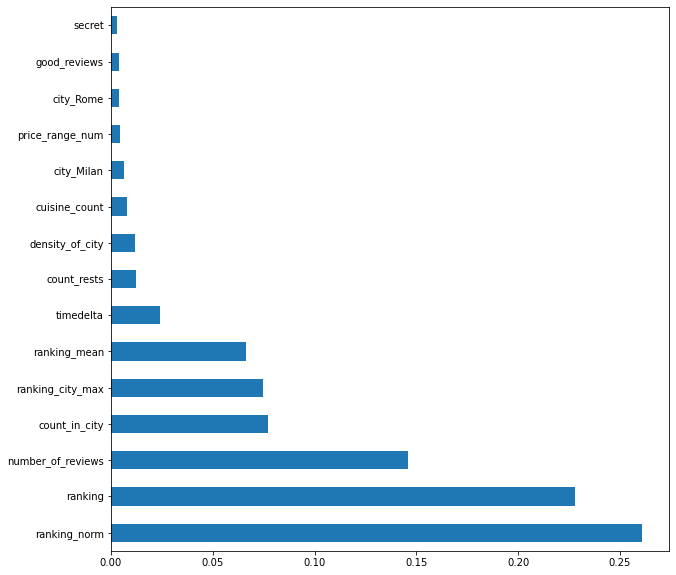

In [77]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [78]:
test_data.sample(10)

,ranking,number_of_reviews,Rating,Number_of_Reviews_isNAN,city_Amsterdam,city_Athens,city_Barcelona,city_Berlin,city_Bratislava,city_Brussels,...,cuisine_count,timedelta,good_reviews,bad_reviews,density_of_city,count_rests,count_in_city,ranking_norm,ranking_mean,ranking_city_max
4168,875.0,80.0,0.0,0,0,0,0,0,0,0,...,1,75,1,0,7385,6,2694,-0.753888,-0.150917,0.705550
1498,1879.0,3.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,2473,10,1816,-0.482541,-0.426331,0.141504
1787,3754.0,0.0,0.0,1,0,0,0,0,0,0,...,1,0,0,0,2473,6,1816,0.024208,-0.426331,0.141504
2976,8167.0,25.0,0.0,0,0,0,0,0,0,0,...,3,0,0,0,5390,3,3813,1.216893,0.195697,1.390404
5436,14563.0,39.0,0.0,0,0,0,0,0,0,0,...,4,9,0,0,5137,3,7193,2.945516,1.217625,3.453887
8913,5514.0,2.0,0.0,0,0,0,0,0,0,0,...,2,0,0,0,5390,2,3813,0.499877,0.195697,1.390404
9162,11743.0,10.0,0.0,0,0,0,0,0,0,0,...,1,-168,0,0,5137,1,7193,2.183365,1.217625,3.453887
1095,950.0,13.0,0.0,0,0,0,0,0,0,0,...,1,521,1,0,6816,14,590,-0.733618,-0.797610,-0.608485
4468,783.0,156.0,0.0,0,0,0,1,0,0,0,...,4,55,1,0,15779,3,3395,-0.778753,0.058106,1.116624
7560,8620.0,34.0,0.0,0,0,0,0,0,0,0,...,2,555,1,0,20781,2,6108,1.339324,0.884887,2.789572


In [79]:
test_data = test_data.drop(['Rating'], axis=1)

In [80]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [81]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [82]:
predict_submission

array([3.035, 4.145, 4.45 , ..., 3.07 , 4.485, 4.155])

In [83]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.035
1,id_1,4.145
2,id_2,4.450
3,id_3,4.365
4,id_4,4.440
5,id_5,4.445
6,id_6,2.215
7,id_7,2.890
8,id_8,4.165
9,id_9,4.745
